In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis= 1, inplace= True)

In [16]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


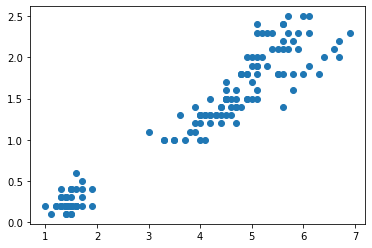

In [20]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [21]:
km = KMeans(n_clusters = 3)

In [23]:
new_df = km.fit_predict(df)

In [24]:
df['cluster'] = new_df

In [25]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [26]:
df.cluster.unique()

array([0, 2, 1], dtype=int32)

In [27]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

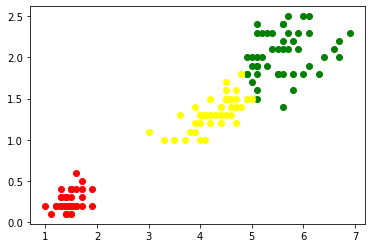

In [28]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'yellow')

# elbow plot

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [31]:
sse

[652.8686666666665,
 112.32079999999999,
 31.371358974358973,
 22.649637861231326,
 14.193126322751322,
 11.412196969696968,
 9.281343349632824,
 7.805547368421054,
 6.8859046771941514]

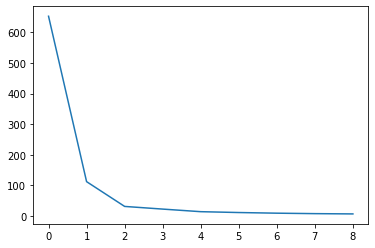

In [32]:
plt.plot(sse)